In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("../summary_data/additional/all_tools_TRB.csv")
df = df.loc[~(df['frequency_TCR'] == 0)]
df2 = pd.read_csv("../summary_data/additional/all_tools_TRB_diversity.csv")

In [3]:
## Calculate TCR-Seq confirmed clonotypes

# MIXCR
MIXCR = df[df.nReads_MIXCR != 0]
clonotype_count_MIXCR = MIXCR.groupby(['Sample'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')
clonotype_count_MIXCR['tool'] = 'MIXCR'

# IMREP
IMREP = df[df.nReads_IMREP != 0]
clonotype_count_IMREP = IMREP.groupby(['Sample'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')
clonotype_count_IMREP['tool'] = 'IMREP'

# TRUST4
TRUST4 = df[df.nReads_TRUST4 != 0]
clonotype_count_TRUST4 = TRUST4.groupby(['Sample'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')
clonotype_count_TRUST4['tool'] = 'TRUST4'

# CATT
CATT = df[df.nReads_CATT != 0]
clonotype_count_CATT = CATT.groupby(['Sample'], sort=False).size().reset_index(name='confirmed_clonotype_count_tool')
clonotype_count_CATT['tool'] = 'CATT'

confirmed_clonotype_count = pd.concat([clonotype_count_MIXCR,clonotype_count_IMREP,clonotype_count_TRUST4,clonotype_count_CATT])
clonotype_count = df2[['Sample','tissue','class','clonotype_count_tool','tool']]
clonotype = pd.merge(confirmed_clonotype_count, clonotype_count, how='inner', on=['Sample','tool'])

clonotype

,Sample,confirmed_clonotype_count_tool,tool,tissue,class,clonotype_count_tool
0,addsample01,15,MIXCR,PBMC,T_cell_rich_high_SDI,150
1,addsample02,46,MIXCR,PBMC,T_cell_rich_high_SDI,222
2,addsample03,19,MIXCR,PBMC,T_cell_rich_high_SDI,54
3,addsample04,23,MIXCR,PBMC,T_cell_rich_high_SDI,139
4,addsample05,292,MIXCR,PBMC,T_cell_rich_high_SDI,406
5,addsample06,303,MIXCR,PBMC,T_cell_rich_high_SDI,485
6,addsample07,85,MIXCR,PBMC,T_cell_rich_high_SDI,154
7,addsample08,58,MIXCR,PBMC,T_cell_rich_high_SDI,259
8,addsample09,54,MIXCR,PBMC,T_cell_rich_high_SDI,111
9,addsample10,68,MIXCR,PBMC,T_cell_rich_high_SDI,189


In [4]:
mean_confirmed_clonotype = clonotype.groupby("class")["clonotype_count_tool","confirmed_clonotype_count_tool"].agg(["mean", "std"])
display(mean_confirmed_clonotype)
tools = ['MIXCR','IMREP','TRUST4','CATT']              
for tool in tools:
    print(tool)
    df_tool = clonotype.loc[clonotype['tool'] == tool]
    mean_confirmed_clonotype_tool = df_tool.groupby("class")["clonotype_count_tool","confirmed_clonotype_count_tool"].agg(["mean", "std"]) 
    display(mean_confirmed_clonotype_tool)

clonotype_count_tool              \
                                     mean         std   
class                                                   
T_cell_rich_high_SDI              528.375  450.374072   

                     confirmed_clonotype_count_tool              
                                               mean         std  
class                                                            
T_cell_rich_high_SDI                         124.75  141.085126

MIXCR


clonotype_count_tool             \
                                     mean        std   
class                                                  
T_cell_rich_high_SDI                216.9  134.35645   

                     confirmed_clonotype_count_tool              
                                               mean         std  
class                                                            
T_cell_rich_high_SDI                           96.3  108.369789

IMREP


clonotype_count_tool             \
                                     mean        std   
class                                                  
T_cell_rich_high_SDI                153.7  86.567957   

                     confirmed_clonotype_count_tool             
                                               mean        std  
class                                                           
T_cell_rich_high_SDI                           57.0  63.030857

TRUST4


clonotype_count_tool              \
                                     mean         std   
class                                                   
T_cell_rich_high_SDI                623.2  289.211879   

                     confirmed_clonotype_count_tool              
                                               mean         std  
class                                                            
T_cell_rich_high_SDI                          175.0  178.600112

CATT


clonotype_count_tool              \
                                     mean         std   
class                                                   
T_cell_rich_high_SDI               1119.7  327.851948   

                     confirmed_clonotype_count_tool              
                                               mean         std  
class                                                            
T_cell_rich_high_SDI                          170.7  165.798439

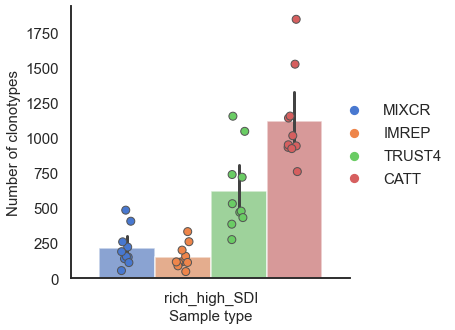

In [5]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))

ax = sns.barplot(x='class',y='clonotype_count_tool',data=clonotype,palette="muted",alpha=0.7,errwidth=3,
                 hue='tool',order=['T_cell_rich_high_SDI'])
sns.stripplot(x="class",y="clonotype_count_tool",data=clonotype,s=8,color=".3",palette="muted",dodge=True,linewidth=1,
              hue='tool',order=['T_cell_rich_high_SDI'])
ax.set(xticklabels=["rich_high_SDI"])

ax.set_xlabel('Sample type',fontsize=15)
ax.set_ylabel('Number of clonotypes',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(0.9, 0.7),frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS18/figureS18a.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS18/figureS18a.png",bbox_inches="tight")

plt.show()

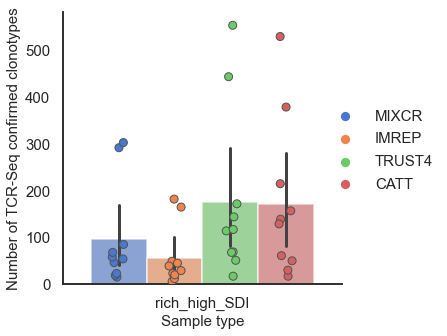

In [6]:
sns.set_style("white") 
sns.set_context("talk")  

ax = plt.subplots(figsize = (5,5))

ax = sns.barplot(x='class',y='confirmed_clonotype_count_tool',data=clonotype,palette="muted",alpha=0.7,errwidth=3,
                 hue='tool',order=['T_cell_rich_high_SDI'])
sns.stripplot(x="class",y="confirmed_clonotype_count_tool",data=clonotype,s=8,color=".3",palette="muted",dodge=True,linewidth=1,
              hue='tool',order=['T_cell_rich_high_SDI'])
ax.set(xticklabels=["rich_high_SDI"])

ax.set_xlabel('Sample type',fontsize=15)
ax.set_ylabel('Number of TCR-Seq confirmed clonotypes',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(0.9, 0.7),frameon=False)
plt.setp(ax.get_legend().get_texts(), fontsize=15) 
plt.setp(ax.get_legend().get_title(), fontsize=15)
sns.despine()

plt.savefig("../figures/supplementary/figureS18/figureS18b.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS18/figureS18b.png",bbox_inches="tight")

plt.show()

MIXCR:  963
IMREP:  570
TRUST4:  1750


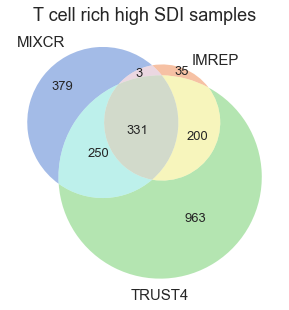

In [7]:
ax = plt.subplots(figsize = (5,5))

MIXCR_figure = MIXCR.loc[MIXCR['class'] == 'T_cell_rich_high_SDI']
MIXCR_list = MIXCR_figure['CDR3'].tolist()
print('MIXCR: ', len(MIXCR_list))
IMREP_figure = IMREP.loc[IMREP['class'] == 'T_cell_rich_high_SDI']
IMREP_list = IMREP_figure['CDR3'].tolist()
print('IMREP: ', len(IMREP_list))
TRUST4_figure = TRUST4.loc[TRUST4['class'] == 'T_cell_rich_high_SDI']
TRUST4_list = TRUST4_figure['CDR3'].tolist()
print('TRUST4: ', len(TRUST4_list))

out = venn3([set(MIXCR_list), set(IMREP_list), set(TRUST4_list)], set_labels=('MIXCR','IMREP','TRUST4'),
           set_colors=['#4878d0','#ee854a','#6acc64'],alpha=0.5)
plt.title('T cell rich high SDI samples')
for text in out.set_labels:
    text.set_fontsize(15)

for text in out.subset_labels:
    text.set_fontsize(13)
    
plt.savefig("../figures/supplementary/figureS18/figureS18c.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS18/figureS18c.png",bbox_inches="tight")

plt.show()

IMREP:  570
TRUST4:  1750
CATT:  1707


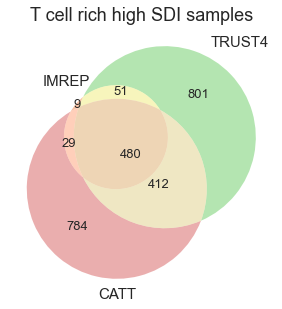

In [8]:
ax = plt.subplots(figsize = (5,5))

IMREP_figure = IMREP.loc[IMREP['class'] == 'T_cell_rich_high_SDI']
IMREP_list = IMREP_figure['CDR3'].tolist()
print('IMREP: ', len(IMREP_list))
TRUST4_figure = TRUST4.loc[TRUST4['class'] == 'T_cell_rich_high_SDI']
TRUST4_list = TRUST4_figure['CDR3'].tolist()
print('TRUST4: ', len(TRUST4_list))
CATT_figure = CATT.loc[CATT['class'] == 'T_cell_rich_high_SDI']
CATT_list = CATT_figure['CDR3'].tolist()
print('CATT: ', len(CATT_list))

out = venn3([set(IMREP_list), set(TRUST4_list), set(CATT_list)], set_labels=('IMREP','TRUST4','CATT'),
           set_colors=['#ee854a','#6acc64','#d65f5f'],alpha=0.5)
plt.title('T cell rich high SDI samples')
for text in out.set_labels:
    text.set_fontsize(15)

for text in out.subset_labels:
    text.set_fontsize(13)
    
plt.savefig("../figures/supplementary/figureS18/figureS18d.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS18/figureS18d.png",bbox_inches="tight")

plt.show()